# 📖 Tares 3
## Teoría de grafos
### Alejandra Torres Manotas

### 👆 Demostraciones.

**Punto 1:** Demostrar que en un árbol $$\sum_{i=1}^{n} deg(v_i)=2|E|.$$

*Demostración:* 

Esto es verdad en general para cualquier grafo sea árbol o no. Sea $G$ un árbol con $n-1$ vértices y por ende $n-2$ aristas, y apliquemos principio de inducción sobre los vértices.

Entonces, sea el número de vértices igual a 2. Dado que un árbol es un grafo conexo la única posibilidad es que tenga la forma

<img src=https://raw.githubusercontent.com/AlejandraTM/GraphTheory/main/Imagenes/arbol2ver.png width="100" height="150">

El grado de cada vértice es dos, por lo tanto 

$$\sum_{i=1}^{2} deg(v_i)=1+1=2,$$

es decir, el número de aristas es 1. Lo que es verdad.

Ahora, tomemos el árbol $G$ para el cual se cumple que 

$$\sum_{i=1}^{n-1} deg(v_i)=2(n-2),$$

nuestra hipótesis de inducción.

Sea $G'=G+u$, el grafo de $n-1$ vértices adicionando un vértice $u$. Dado que $G'$ debe ser un árbol, $u$ conecta con un solo vértice en $G'$, es decir, si $x$ es el vértice con el que conecta $u$, $deg(x)=(\text{El grado de }x\text{ en }G + 1)$ y $deg(u)=1$. Entonces, partiendo de la hipótesis de inducción tendremos:

$$\sum_{i=1}^{n} deg(v_i) +1 +desg(u)=\sum_{i=1}^{n} deg(v_i)=2(n-2)+2=2(n-1).$$

Con lo cual se concluye la demostración.

_______________________________________________________________________________________________________________

**Punto 2:** Demostrar que en un árbol dirigido $$\sum_{i=1}^{n} deg^{-}(v_i)=|E|.$$

*Demostración:* 

Tomenos a $G$ un árbol, cada vértice en él tine o un vértice de salida, o un vértice de llegada, o uno de salida y uno de llegada. Entonces, como $G$ es dirigido hay tantas aristas como vértices sin contar la raíz, ya que este vértice tiene solo un grado de salida. Por lo tanto,

$$\sum_{i=1}^{n} deg^{-}(v_i)=0+1+1+...+1=n-1.$$

________________________________________________________________________________________________________________
________________________________________________________________________________________________________________

### ✌️ Práctica.

**Punto 1:** Al igual que en la pelicula *"Cadena de favores"* un niño decide hacerle un favor a tres personas y luego le pide que cada una se lo haga a tres personas más, y así sucesivamente. De esta manera y si nadie recibiera un faor dos veces, en el paso 1, tres personas reciben un favor, en el paso 2, nueve, y así sucesivamente. Si el pueblo tiene 364 habitantes ?cuántos pasos se posrían dar sin que nadie recibiera un favor dos veces?


*Solución:* 

Si pensamos en el problema como un árbol enraizado, la raíz representa al niño que hace los tres primeros favores, el siguiente nivel representa a las personas que recibieron ese favor y haran, cada una, tres más, el tercer nivel a las personas que reciben el favor, y así sucesivamente. Con esto tendrémos:

<img src=https://raw.githubusercontent.com/AlejandraTM/GraphTheory/main/Imagenes/arbol.png width="300" height="350">

Es decir, para el nivel uno hay $3^0$ personas, para el nivel dos $3^1$ personas, y así hasta el nivel $n$ donde habran $3^n$ personas. Entonces para saber cuántos vértices tendrá el árbol sumamos los vértices en cada nivel:

$$3^0+3^1+3^2+...+3^n=\frac{1}{2}(3^{n+1}-1).$$

Por lo tanto, se debe hallar el $n$ más pequeño tal que $$\frac{1}{2}(3^{n+1}-1)\leq 364.$$

Finalmente tenemos que, para $n=5$, $\frac{1}{2}(3^{6}-1)=\frac{728}{2}=364$, $5$ son los pasos que se pueden dar para que nadie reciba un favor dos veces.

________________________________________________________________________________________________________________

**Punto 2:** En el siguiente grafo aplique el algoritmo de Dijkstra desde el vértice $A$ para hallar la distancia más corta al resto de los vértices.

<img src=https://raw.githubusercontent.com/AlejandraTM/GraphTheory/main/Imagenes/41840.jpg width="300" height="150">


*Solución:*

En la siguiente tabla se desarrolla el algoritmo paso a paso, resaltando en negrita el vértice con el acumulado de los pesos que se va siguiendo y es el que tiene el menos peso.

\begin{array}{|c|c|c|c|c|c|}
\hline Paso & A & B & C & D & E \\\hline
  1  & 0 & \mathbf{(2,A)} & (6,A) & (9,A) & (6,A) \\\hline
  2  & - & (2,A) & \mathbf{(5,B)} & \infty & \infty \\\hline
  3  & - & - & (5,B) & \mathbf{(8,C)} & \infty \\\hline
  4  & - & - & - & (8,C) & \mathbf{(11,D)}  \\\hline
  5  & - & - & - & - & -  \\\hline
\end{array}

Finalmente, se evidencia que el camino más corto tiene un peso de $11$ y va de $A$ a $E$.

__________________________________________________________________________________________________________________

**Punto 3:** Represente en Python el árbolde la respuesta anterior.

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

In [7]:
k=nx.Graph()
C=["A","B","C","D","E"] #Conjunto de vértices
D=[("A","B"),("B","C"),("C","D"),("D","E")] 

In [8]:
k.add_nodes_from(C)
k.add_edges_from(D)

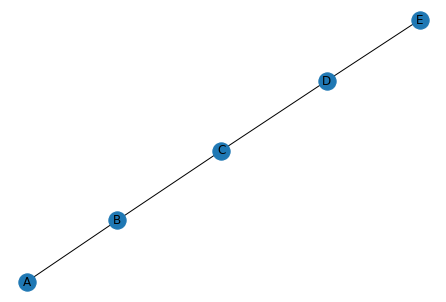

In [9]:
nx.draw(k,with_labels=True)

_________________________________________________________________________________________________________________
_________________________________________________________________________________________________________________

###  🤟 Investigación.

**Punto 1:** Investigue si existe un algoritmo para encontrar el camino más corto para todo par de vértices de un grafo. En caso de que sí, describa a partir de un ejemplo cómo funciona dicho algoritmo.

En la busqueda encontré dos tipos de algoritmos:

* Aquellos que resuelven el problema del camino más corto desde un vértice inicial:
    * Dijkstra
    * Bellman-Ford
    * Viterbi
* Aquellos que resuelven el problema del camino más corto entre cualesquiera par de vértices:
    * Busqueda A*
    * Flyd-Warshall
    * Johnson
    
Pero se explicará un algoritmo de cada tipo.

El algoritmo de **Bellman-Ford** se usa cuando los pesos en un grafo dirigido son valores negativos. El algoritmo recibe un grafo $G=(V,A)$ con una función de peso $\phi: A \rightarrow \mathbb{R}$ y un vértice inicial $v_0$, y regresa un valor buleano 1 si existen caminos de peso negativo y dice que no hay solución o 0 si no hay caminos de peso negativo junto con el camino más corto.

Entonces, en el **paso1** se toma el vétice $v_0$ y se evaluan los vértices adyacentes. En el caso que el vértice sea adyacente entonces se coloca $(v_0,k)$, la primera entrada corresponde al vértice por el cual pasó para llegar y la segunda entrada el peso del trayecto. En el **paso 2** se toma, por ejemplo, al vértice $v_1$ adyacente a $v_0$ y se evaluan todos los vertices adyacentes a él, y se compara el peso del camino para ir de $v_0$ a $v_1$ directamente con el peso de los caminos para ir de $v_0$ a $v_1$ pasando por $v_i$, donde $v_i$ es adyacente a $v_0$, y se conserva el que tenga un peso menor. Se continua de esta forma hasta que el **paso n** sea igual al **paso n-1**, es decir, no exista un manino más corto que el ya calculado para llegar del vértice $v_0$ a ese punto.

Veamos el siguiente ejemlo:

<table border="0">
 <tr>
    <td>
        <img src=https://raw.githubusercontent.com/AlejandraTM/GraphTheory/main/Imagenes/Bellman-Ford.png width="200" height="150">
    </td>
    <td>
    \begin{array}{|c|c|c|c|c|c|}
        \hline Paso & A & B & C & D & E \\\hline
          1  & (A,0) & (A,7) & \infty  & (A,6) & \infty  \\\hline
          2  & (A,0) & (A,7) & (D,2) & (A,6) & (B,4) \\\hline
          3  & (A,0) & (A,7) & (D,2) & \mathbf{(E,2)} & (B,4) \\\hline
          Solución  & (A,0) & (A,7) & (D,2) & (E,2) & (B,4) \\\hline
     \end{array}
    </td>
 </tr>
</table>


En la tabla se ejemplifican los pasos anteriormente mencionados. En negrita se evidencia el momento en el que el camino que se consuderaba más corto para ir de A a D es descartado por uno más corto que debe pasar por E.

El algoritmo de **Floy-Warshall** es un algoritmo recursivo que tiene como objetivo encontrar la ruta más corta para cualesquiera dos vértices en el grafo, y es usado para dar solución a otros problemas como por ejemplo:

* Encontrar el lenguaje regular aceptado por un autómata finito.
* Encontrar matrices invesas.
* Encontrar el camino con mayor flujo entre dos vértices.
* Verificar cuando un grafo es bipartito.

¿Cómo funciona? Dado un grafo $G$ con $n$ vértices etiquetados de $1$ hasta $n$, se define una función *CaminoMinimo(i,j,k)* que encuentra el camino más corto entre los vértices $i$ y $j$ pasando por los vértices de $1$ a $k$. Pero existen dos opciones para este camino más cortos:

* Que sea aquel que va de $i$ a $j$ pasando por $k$, 
* o sea el camino que va de $i$ a $k$ pasando por algún otro vértice entre $1$ y $k-1$ concatenado con el camino que va  de $k$ a $j$ pasando por algún vértice entre $1$ y $k-1$.

Ahí está lo recusivo.

En otras palabras, se inicia con una matriz de distancias $D$, en el **paso 1** se hallan los caminos más cortos que pasan por el vértice 1 entre todos los vértices $i$ y $j$ y dicha información se almacena en $D$ en la correpondiente entrada $[D]_{i,j}$. En el **paso 2** se hallan los caminos más cortos que pasan por el vértice 2 entre todos los vértices $i$ y $j$ y dicha información se almacena en $D$ en la correpondiente entrada $[D]_{i,j}$. Se continua de esta forma hasta que $k=n$. La matriz resultante será la matriz de distancias mínimas entre cualesquiera de los vértices del grafo.

Veamos el siguiente ejemplo:

<table border="0">
 <tr>
    <td>
     <img src=https://raw.githubusercontent.com/AlejandraTM/GraphTheory/main/Imagenes/Floyd-Warshall.png width="180" height="150">
    </td>
    <td>
     $$D=\begin{bmatrix} 0 & 1 & \infty & \infty \\ 1 & 0 & 2 & 5\\ \infty & 2 & 0 & 1\\ \infty & 5 & 1 & 0 \end{bmatrix}$$
    </td>
 </tr>
</table>



Tenemos el grafo y su correspondiente matriz de distancias. Vamos a ver la función *CaminoMínimo(i,j,k)* de la forma siguiente $d_{i,j}=min\{d_{i,j},d_{i,k}+d_{k,j}\}$ donde $d_{i,j}$ son las entradas de la matriz $D$. Además, como se eligió un grafo no dirigido la matriz de distancias es simétrica, entonces es suficiente con var la parte triangular superior de la matriz.

Desarrollemos el algoritmo paso a paso:

**Paso 1:** Caminos que pasan por a.

$d_{b,c}=min\{d_{b,c},d_{b,a}+d_{a,c}\}=min\{2,1+\infty\}=2$,

$d_{b,d}=min\{d_{b,d},d_{b,a}+d_{a,d}\}=min\{5,1+\infty\}=5$.

$d_{c,d}=min\{d_{c,d},d_{c,a}+d_{a,d}\}=min\{1,\infty+\infty\}=5$.

Entonces, la matriz $D$ toma la forma:

$$\begin{bmatrix} 0 & 1 & \infty & \infty \\ 1 & 0 & 2 & 5\\ \infty & 2 & 0 & 1\\ \infty & 5 & 1 & 0 \end{bmatrix}$$

**Paso 2:** Caminos que pasan por b.

$d_{a,c}=min\{d_{a,c},d_{a,b}+d_{b,c}\}=min\{\infty,1+2\}=3$,

$d_{a,d}=min\{d_{a,d},d_{a,b}+d_{b,d}\}=min\{\infty,1+5\}=6$.

$d_{c,d}=min\{d_{c,d},d_{c,b}+d_{b,d}\}=min\{1,2+5\}=1$.

Entonces, la matriz $D$ toma la forma:

$$\begin{bmatrix} 0 & 1 & 3 & 5 \\ 1 & 0 & 2 & 5\\ 3 & 2 & 0 & 1\\ 5 & 5 & 1 & 0 \end{bmatrix}$$

**Paso 3:** Caminos que pasan por c.

$d_{a,b}=min\{d_{a,b},d_{a,c}+d_{c,b}\}=min\{1,\infty+0\}=1$,

$d_{a,d}=min\{d_{a,d},d_{a,c}+d_{c,d}\}=min\{\infty,\infty+1\}=\infty$.

$d_{b,d}=min\{d_{b,d},d_{b,c}+d_{c,d}\}=min\{5,2+1\}=3$.

Entonces, la matriz $D$ toma la forma:

$$\begin{bmatrix} 0 & 1 & 3 & 5 \\ 1 & 0 & 2 & 3\\ 3 & 2 & 0 & 1\\ 5 & 5 & 1 & 0 \end{bmatrix}$$

**Paso 4:** Caminos que pasan por d.

$d_{a,b}=min\{d_{a,b},d_{a,d}+d_{d,b}\}=min\{1,\infty+5\}=1$,

$d_{a,c}=min\{d_{a,c},d_{a,d}+d_{d,c}\}=min\{\infty,\infty+1\}=\infty$.

$d_{b,c}=min\{d_{b,c},d_{b,d}+d_{d,c}\}=min\{2,5+1\}=2$.

Finalmente, la matriz $D$ toma la forma:

$$\begin{bmatrix} 0 & 1 & 3 & 5 \\ 1 & 0 & 2 & 3\\ 3 & 2 & 0 & 1\\ 5 & 5 & 1 & 0 \end{bmatrix}$$


**Referencias:**

1. Moisés Gautier Gómez. Suite informática de Teoría Algorítmica de Grafos. Escuela Superior de Ingeniería. Universidad de Cadis.
2. [Algoritmo de Dijkstra e Bellman - Ford - UNISC](https://www.youtube.com/watch?v=aJ_2c9NVCIc)
3. Santanu Saha Ray. Graph Theory with Algorithms and its Applications.Springer(2013).